## Proximal Policy Optimization: Reacher-v1

By Patrick Coady: [Learning Artificial Intelligence](https://learningai.io/)

## Summary

The same learning algorithm was used to train agents for each of the ten OpenAI Gym MuJoCo continuous control environments. The only difference between evaluations was the number of episodes used for training, otherwise all options were the same. The code is available in the [GitHub repository](https://github.com/pat-coady/trpo/tree/aigym_evaluation). The exact code used to generate the submissions is in the **`aigym_evaluation`** branch.

The README.md file in the GitHub repository provides additional details on the algorithm and usage instructions. Also, the code was written to be understandable and easily modifiable. 

Here are the key points:

* Proximal Policy Optimization (similar to TRPO, but uses gradient descent with KL loss terms)  \[1\] \[2\]
* Value function approximated with 3 hidden-layer NN (tanh activations):
    * hid1 size = obs_dim x 10
    * hid2 size = geometric mean of hid1 and hid3 sizes
    * hid3 size = 5
* Policy is a multi-variate Gaussian parameterized by a 3 hidden-layer NN (tanh activations):
    * hid1 size = obs_dim x 10
    * hid2 size = geometric mean of hid1 and hid3 sizes
    * hid3 size = action_dim x 10
    * Diagonal covariance matrix variables are separate from the NN
* Generalized Advantage Estimation (gamma = 0.995, lambda = 0.98) \[3\] \[4\]
* ADAM optimizer used for both neural networks
* Policy is evaluated for **50** episodes, and then updated
* Value function is trained on current batch + previous batch
* Policy and Value NNs built with TensorFlow

**Below you will find various training curves for this environment.**

### References

1. [Trust Region Policy Optimization](https://arxiv.org/pdf/1502.05477.pdf) (Schulman et al., 2016)
2. [Emergence of Locomotion Behaviours in Rich Environments](https://arxiv.org/pdf/1707.02286.pdf) (Heess et al., 2017)
3. [High-Dimensional Continuous Control Using Generalized Advantage Estimation](https://arxiv.org/pdf/1506.02438.pdf) (Schulman et al., 2016)
4. [GitHub Repository with several helpful implementation ideas](https://github.com/joschu/modular_rl) (Schulman)

In [1]:
# ENTER LIST OF LOG FILENAMES HERE:
filepaths = ['../src/log-files/Reacher-v1/Jul-26_23:30:06/log.csv']

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotting import df_plot
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,5)
plt.style.use('ggplot')

In [3]:
dataframes = []
names = []
for filepath in filepaths:
    names.append(filepath.split('/')[-2])
    dataframes.append(pd.read_csv(filepath))
data = list(zip(dataframes, names))
for df, name in data:
    ma = np.convolve(df['_MeanReward'], np.ones((5,))/5, mode='valid')
    print('{}: Maximum 100 Episode Average = {:.3g} around Episode {}'
          .format(name, np.max(ma), np.argmax(ma) * 50))

Jul-26_23:30:06: Maximum 100 Episode Average = -3.52 around Episode 52650


# Training Curves

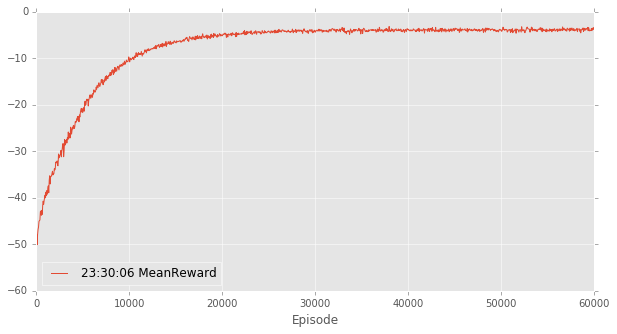

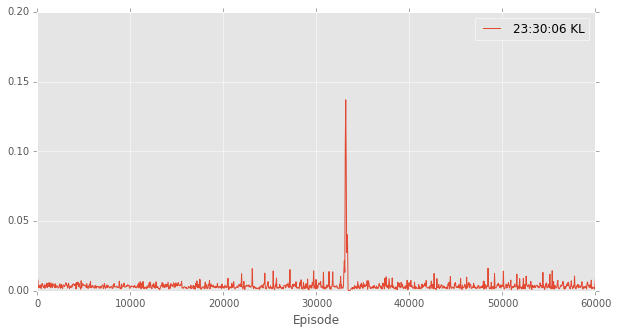

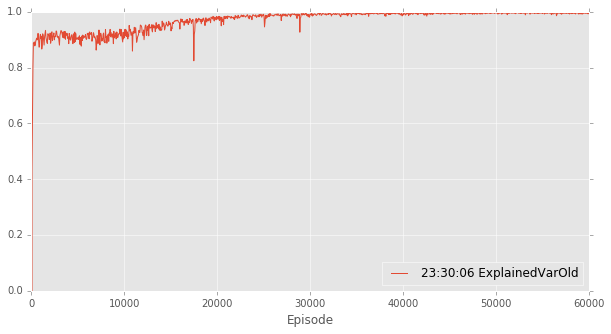

In [4]:
# Mean Reward, D_KL(pi_old || pi_new), and Value Function Explained Variance
df_plot(data, '_Episode', ['_MeanReward'])
df_plot(data, '_Episode', ['KL'], ylim=(0,0.2))
df_plot(data, '_Episode', ['ExplainedVarOld'], ylim=(0,1))

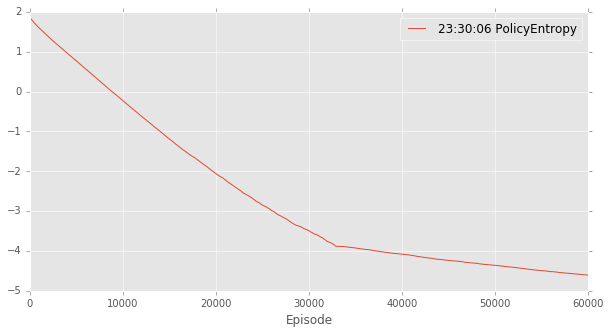

In [5]:
# Policy Entropy
df_plot(data, '_Episode', ['PolicyEntropy'])

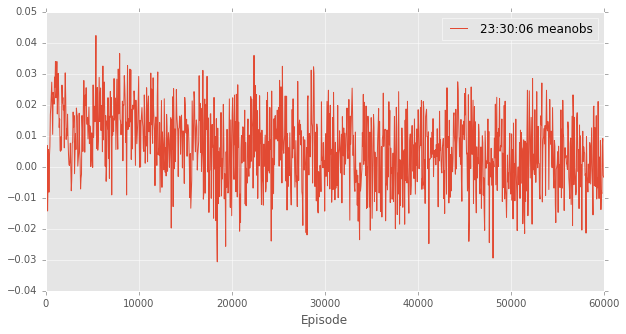

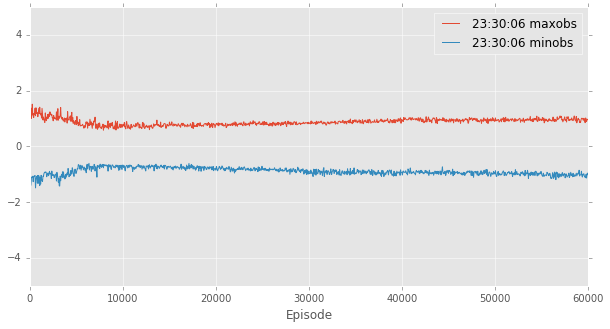

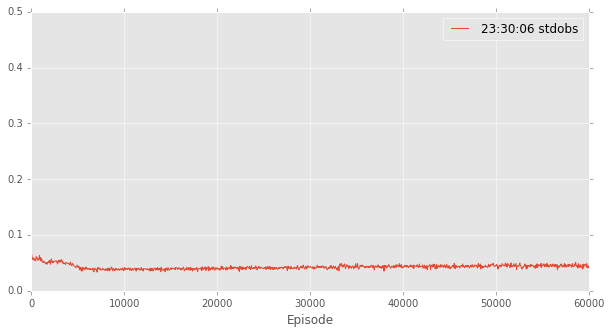

In [6]:
# Observations Statistics (after scaling)
df_plot(data, '_Episode', ['_mean_obs'])
df_plot(data, '_Episode', ['_max_obs', '_min_obs'], ylim=(-5, 5))
df_plot(data, '_Episode', ['_std_obs'], ylim=(0, 0.5))

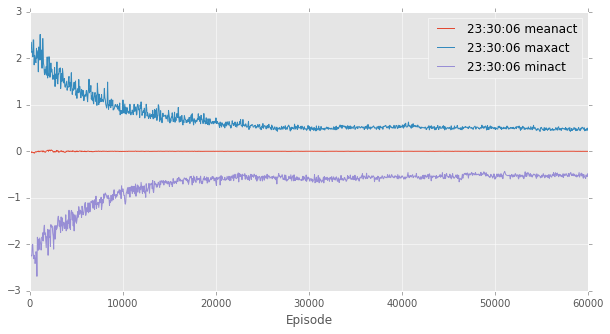

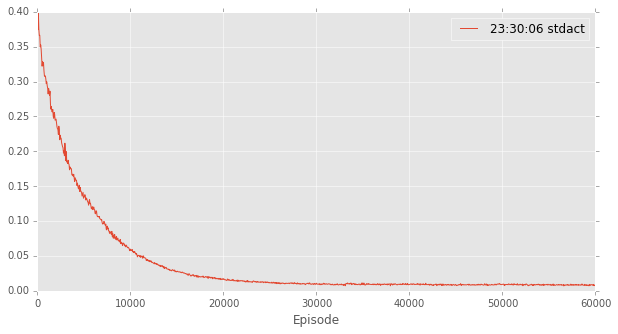

In [7]:
# Actions Statistics
df_plot(data, '_Episode', ['_mean_act', '_max_act', '_min_act'])
df_plot(data, '_Episode', ['_std_act'])

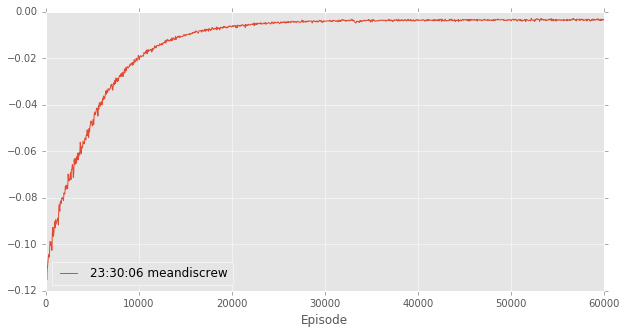

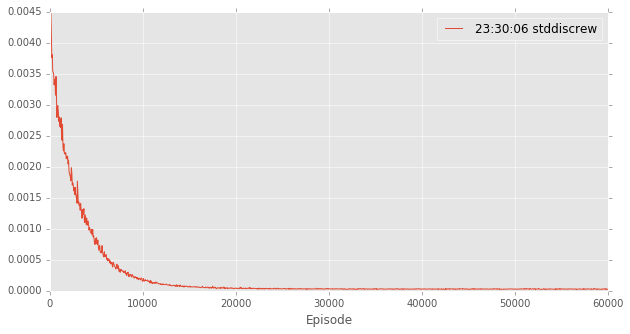

In [8]:
# Discounted Reward Statistics
df_plot(data, '_Episode', ['_mean_discrew'])
df_plot(data, '_Episode', ['_std_discrew'])

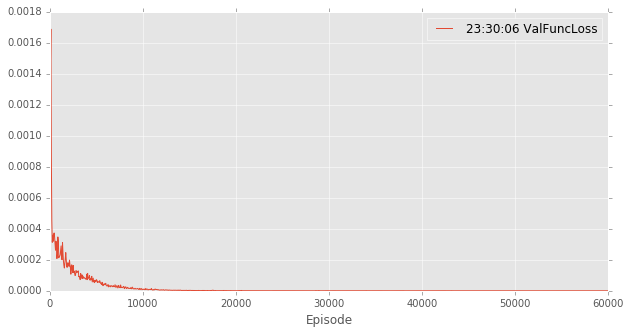

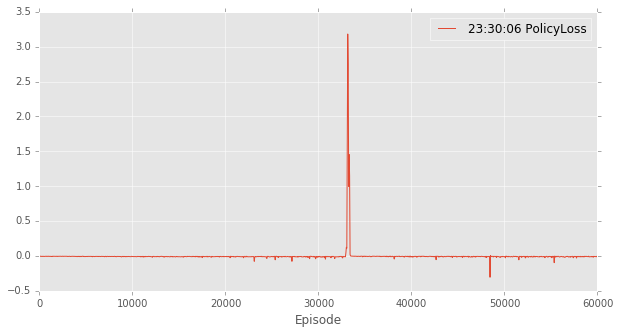

In [9]:
# Policy and Value Function Training Loss
df_plot(data, '_Episode', ['ValFuncLoss'])
df_plot(data, '_Episode', ['PolicyLoss'])

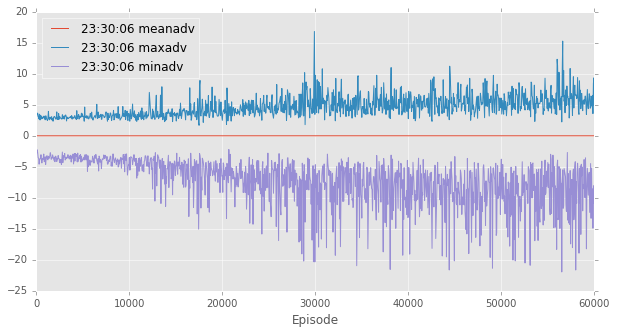

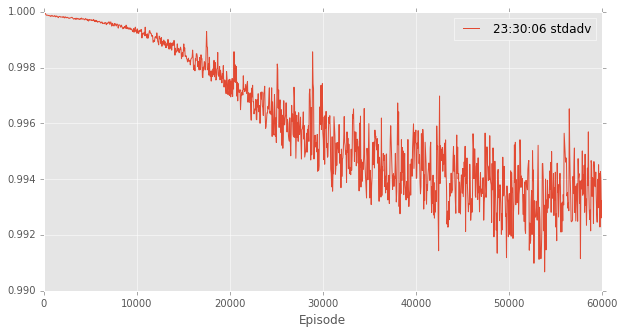

In [10]:
# Actions Statistics
df_plot(data, '_Episode', ['_mean_adv', '_max_adv', '_min_adv'])
df_plot(data, '_Episode', ['_std_adv'])